---

# **Machine Learning Prediction on Bike Sharing Data**

-----

## **Business Problem Understanding**

**Context**

Capital Bikeshare is one of the companies engaged in the provision of bicycle-sharing services. In contrast to the conventional bicycle rental system, the entire rental process has been digitised. The user is only required to scan a QR code in order to unlock the bicycle, which they then ride and subsequently return to one of the docking stations that are located throughout the city. At present, there are more than 500 bicycle-sharing programmes globally, comprising over 500,000 bicycles.

The digital nature of the Capital BikeShare system enables the collection of data pertaining to users, the number and duration of trips, travel routes, and other relevant information. This data can be analysed to gain valuable insights, particularly when combined with other data sets, such as weather data. These insights can inform future business decisions and enhance the overall performance of Capital BikeShare. 

https://capitalbikeshare.com 


**Problem Statement**

The optimal number of bikes required by the bike-sharing system is a key challenge. Insufficient provision will fail to meet customer demand, whereas oversupply may lead to inefficiency, with significant numbers of bikes left unused. This number is useful for bike procurement, maintenance schedule and marketing strategies such as promotion to boost the rent for when the predicted number is low.

**Goals**

The objective is to forecast the number of bicycles required at a specific time and under a given weather condition, utilising the most appropriate regression model for the metrics provided in this dataset.

**Analytic Approach**

In this project, the following regression models will be applied:
1. Linear Regression
2. K Nearest Neighbours
3. Decision Tree Regressor
4. Random Forest Regressor
5. XGB Regressor

**Metric Evaluation**

* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)
* R-squared

<br>

## **Data Understanding**

Data source : 
* Original Source: http://capitalbikeshare.com/system-data* 
Weather Information: http://www.freemeteo.com

In [18]:
# import necessary libraries for the EDA
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Load dataset
df = pd.read_csv("data_bike_sharing.csv") # this DataFrame will be used solely for EDA

# duplicate dataframe 
df_model = df.copy() # this DataFrame will be used solely for machine learning models

df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [20]:
# Dataset time range
end_date = df["dteday"].max()
start_date = df["dteday"].min()
print(f"The time range of this dataset is from {start_date} to {end_date} \n")

The time range of this dataset is from 2011-01-01 to 2012-12-31 



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


<br>

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object  | date |
| hum | Float | Normalized humidity The values are divided into 100 (max) |
| weathersit | Integer | Wheather condition score (1-4) |
| holiday | Integer | Holiday (1) or not (0) |
| season | Integer | Season (1: winter, 2: spring, 3: summer, 4: fall) |
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| temp | Float | Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| hr | Integer | Hour (0 to 23) |
| casual | Integer | Count of casual users |
| registered | Integer | Count of registered users |
| cnt | Integer | Count of total rental bikes including both casual and registered |

> *Note :* \
> Wheather condition score (weathersit):\
> 1 = Clear, Few clouds, Partly cloudy, Partly cloudy\
> 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\
> 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\
> 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<br>

In [23]:
# Data checking
listItem = []
for i in df.columns :
    listItem.append([i, df[i].dtype, df[i].isna().sum(), round((df[i].isna().sum()/len(df[i])) * 100,2),
                    df[i].nunique(), list(df[i].drop_duplicates().sample(2).values)]);

dataDesc = pd.DataFrame(columns=['column', 'data type', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dataDesc

,column,data type,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2011-10-05, 2012-05-04]"
1,hum,float64,0,0.0,89,"[0.48, 0.6]"
2,weathersit,int64,0,0.0,4,"[1, 4]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[1, 2]"
5,atemp,float64,0,0.0,65,"[0.0606, 0.0758]"
6,temp,float64,0,0.0,50,"[1.0, 0.16]"
7,hr,int64,0,0.0,24,"[20, 19]"
8,casual,int64,0,0.0,305,"[118, 140]"
9,registered,int64,0,0.0,742,"[508, 116]"


In [24]:
# Checking for duplicates
df.duplicated().sum()

0

> * There are no missing values or duplicate values in this dataset.
> * The data type of the dteday column remains as a string. In order to extract the day, date, month and year, it is necessary to convert this to a datetime type.

In [26]:
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


<br>
<br>

# **Exploratory Data Analysis**

## **Data Preprocessing**

In [29]:
# Changing dteday datatype into datetime 
df["dteday"] = df["dteday"].astype('datetime64[ns]')

In [30]:
# Splitting month, and day into separate columns
df["month"] =  df["dteday"].dt.month
df["day"] = df["dteday"].dt.day_name()

In [31]:
# Renaming columns
df.rename({"dteday" : "date", "weathersit" : "weather", "hr" : "hour", "cnt" : "count"}, axis = 1, inplace=True)
df.head()

,date,hum,weather,holiday,season,atemp,temp,hour,casual,registered,count,month,day
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,12,Friday
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,Sunday
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,6,Wednesday
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,3,Saturday
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,7,Tuesday


In [32]:
df = df[df["hum"]!=0]

In [33]:
# changing seasons name instead of number to allow easy reading
season_mapping = {1: "winter", 2: "spring", 3: "summer", 4: "fall"}
df["season"] = df["season"].replace(season_mapping)
df.head()

,date,hum,weather,holiday,season,atemp,temp,hour,casual,registered,count,month,day
0,2011-12-09,0.62,1,0,fall,0.3485,0.36,16,24,226,250,12,Friday
1,2012-06-17,0.64,1,0,spring,0.5152,0.54,4,2,16,18,6,Sunday
2,2011-06-15,0.53,1,0,spring,0.6212,0.62,23,17,90,107,6,Wednesday
3,2012-03-31,0.87,2,0,spring,0.3485,0.36,8,19,126,145,3,Saturday
4,2012-07-31,0.55,1,0,summer,0.6970,0.76,18,99,758,857,7,Tuesday


There is no humidity 0 in natural environment (non-lab setting), therefore row with 0 humidity is deleted.

In [35]:
df = df[df["hum"]!=0]

> **Summary**
> * in this step we change the data type of "dteday" column into datetime type and create 2 new columns : "month" and "day"
> * we also deleted rows with humidity value = 0

<br> 

### 1. Distribution Plot of Numerical Variabels

In [38]:
target = df["count"]
numerical_features = [df["hum"], df["atemp"], df["temp"]]
title_a = ["count", "humidity", "feeling temperature", "temperature"]

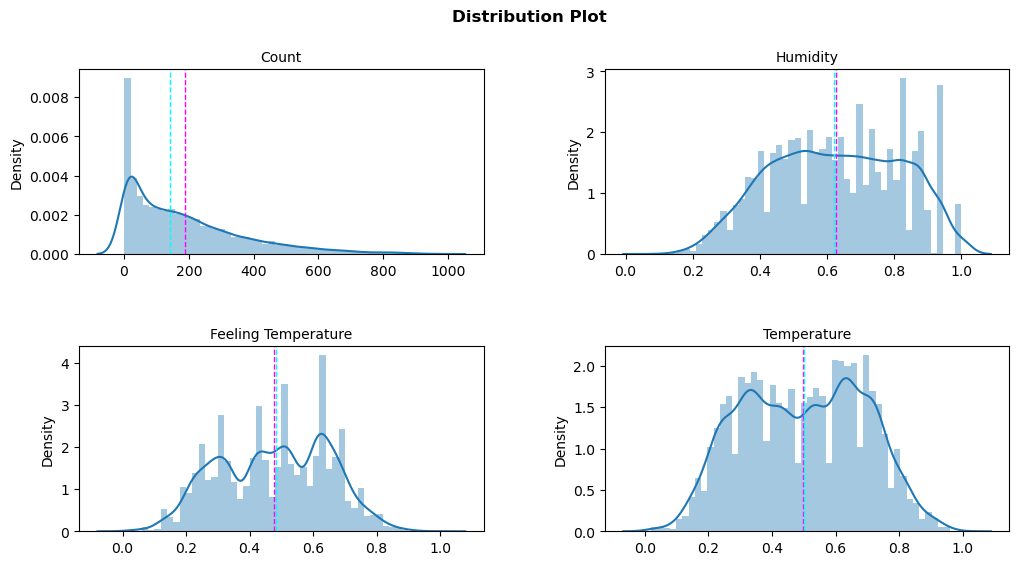

In [39]:
plt.figure(figsize=(12, 6))
plt.suptitle("Distribution Plot", fontsize=12, fontweight="bold" , y=.98)

for n, ticker in enumerate([target] + numerical_features): 
    # add a new subplot iteratively
    ax = plt.subplot(2,2, n + 1)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    # filter df and plot ticker on the new subplot axis
    sns.distplot(ticker, bins = 50)
    plt.axvline(ticker.mean(), color='magenta', linestyle='dashed', linewidth=1, label = "mean")
    plt.axvline(ticker.median(), color='cyan', linestyle='dashed', linewidth=1, label = "median")
    ax.set_title(title_a[n].title(), fontsize=10)
    ax.set_xlabel("")

> * The distribution plot of bike share count reveals a right-skewed distribution, indicating a positive skewness in the count values. This indicates the presence of large outliers.
> * Variable "temperature" showing a bimodal distribution.
> * In order to address the skewness of the variable "count", a reverse logarithmic transformation is applied in order to facilitate predictive modelling. This transformation aims to render the data distribution more symmetrical.

> * Other than "count", all numerical features exhibit some resemblance to a normal/symmetrical distribution (mean dan median almost at the same value)

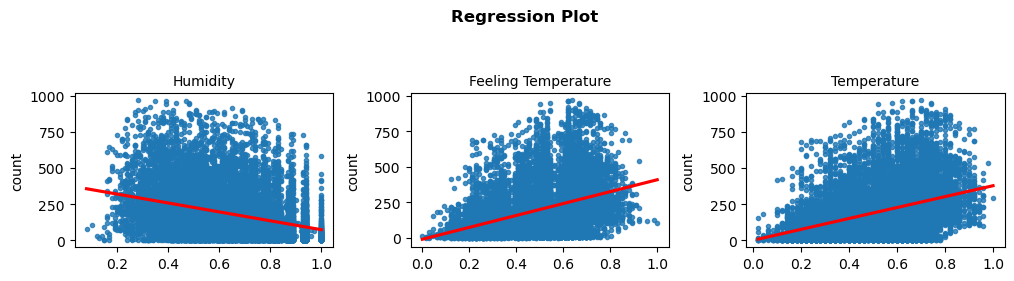

In [42]:
numerical_features = [df["hum"], df["atemp"], df["temp"]]
title_b = ["humidity", "feeling temperature", "temperature"]

plt.figure(figsize=(12, 2))
plt.suptitle("Regression Plot", fontsize=12,fontweight="bold", y=1.3)

for n, ticker in enumerate(numerical_features):  
    ax = plt.subplot(1,3, n+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.regplot(x=ticker,y=target,line_kws={"color": "red"}, marker="." )   
    ax.set_title(title_b[n].title(), fontsize=10)
    ax.set_xlabel("")

> * In general, there is a negative correlation between "humidity" and "count", whereas there is a positive correlation between "temperature" and "count".


<br>

### 2. Distribution of Categorical Variabels

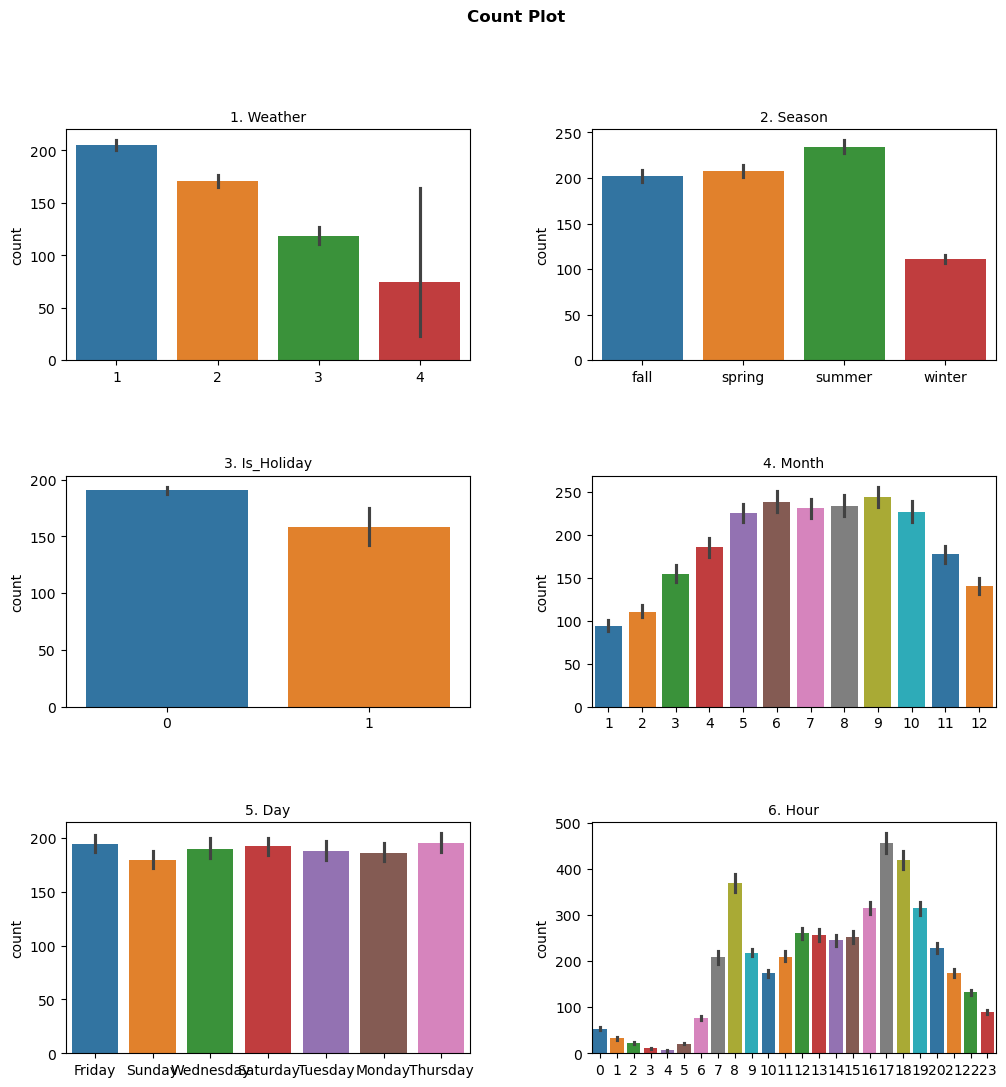

In [46]:
categorical_features = [df["weather"], df["season"], df["holiday"], df["month"], df["day"], df["hour"]]
title_c = ["1. weather", "2. season", "3. is_holiday", "4. month", "5. day", "6. hour"]

plt.figure(figsize=(12, 12))
plt.suptitle("Count Plot", fontsize=12,fontweight="bold", y=.98)

for n, ticker in enumerate(categorical_features):
    ax = plt.subplot(3,2, n+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.barplot(x=ticker, y = target, palette="tab10")   
    ax.set_title(title_c[n].title(), fontsize=10)
    ax.set_xlabel("")

> * The figure in the top left demonstrates that the average count is significantly affected by weather conditions.
> * People tend to rent bike on the summer, followed by spring and fall, and least count is recorded in the winter. similar result is shown on Month table.
> * The data indicate that weather conditions exert a negative influence on the count. The highest average is observed in weather condition 1 (sunny/slightly cloudy), while the lowest is seen in weather condition 4 (heavy rain, ice pallets, thunderstorm, mist, snow, and fog). Therefore, we will treat weather as an ordinal variable. Additionally, please note that the data spread in weather condition 4 is notably broad. 
> * There are more people rent the bike on non-holiday
> * Count peaks in th morning (around 8AM) and in the afternoon (around 17 PM)

<br>

### 3. Hourly bike rental distribution

**Average count per day**

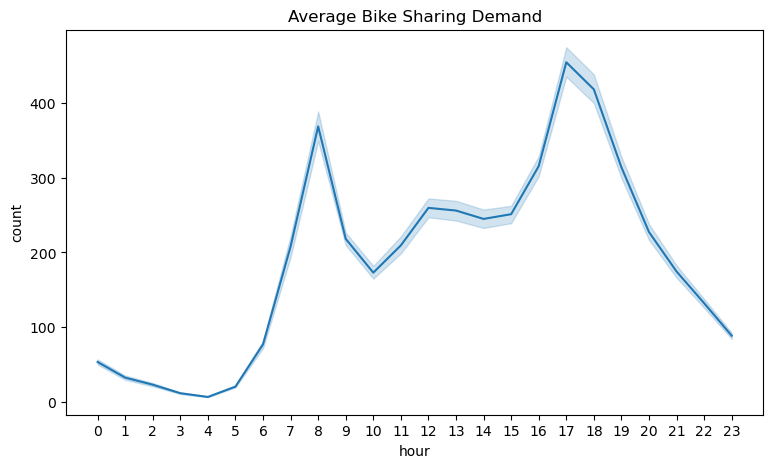

In [51]:
plt.figure(figsize = (9,5))
sns.lineplot(x = 'hour', y= 'count', data = df)
plt.title("Average Bike Sharing Demand")                                                                                                                                                                                                                                                #mahinisawesomemate
a = plt.xticks(ticks = np.arange(0,24,1))

**Hourly pattern on weekdays and weekends**

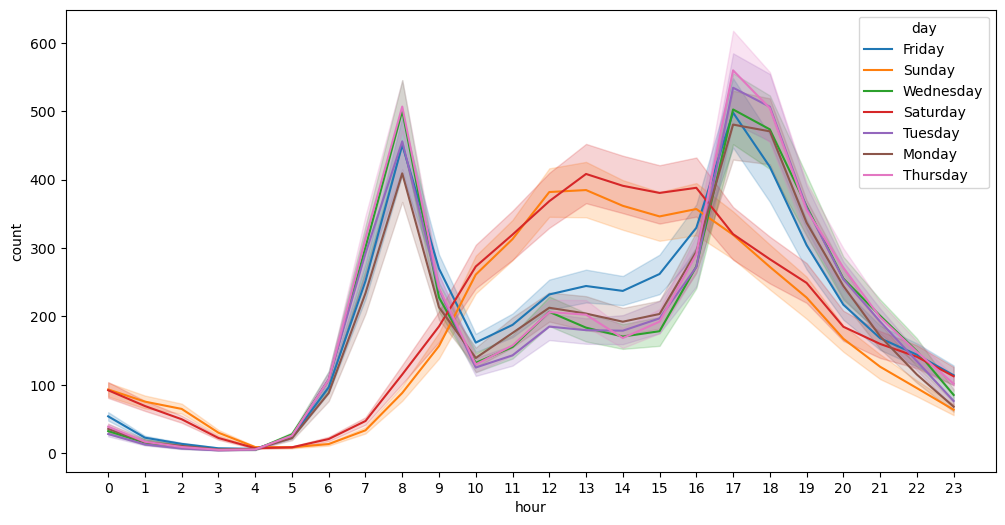

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="hour", y="count", hue="day");
x = plt.xticks(ticks = np.arange(0,24,1))

> * weekend and weekdays different pattern
> * on weekdays demand gradually increasing with most count recorded in the afternoon
> * on weekdays peaks in the morning and in the late afternoon, this suggest that most bikes rented by working-class people who use bike right before and after working hours

**Hourly pattern on holidays and non-holidays**

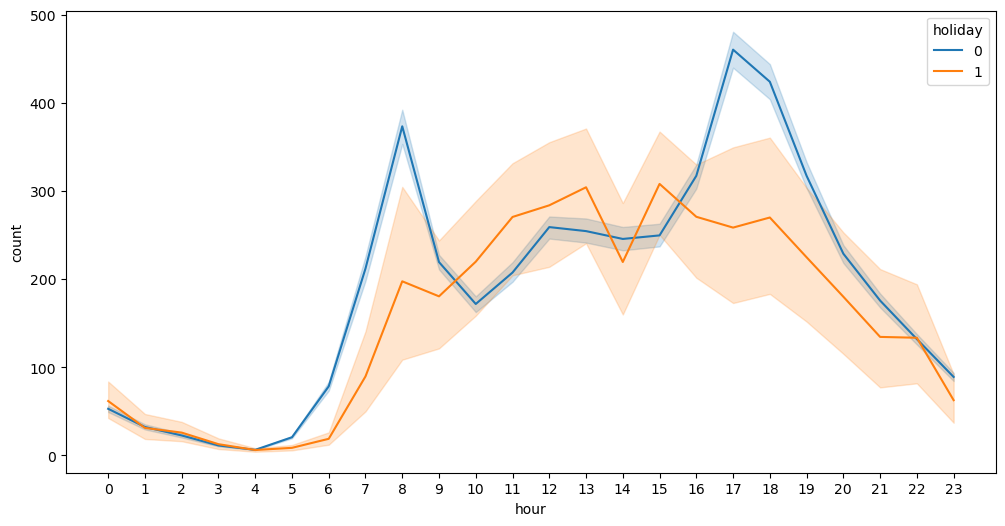

In [56]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="hour", y="count", hue="holiday");
x = plt.xticks(ticks = np.arange(0,24,1))

**Hourly pattern each season**

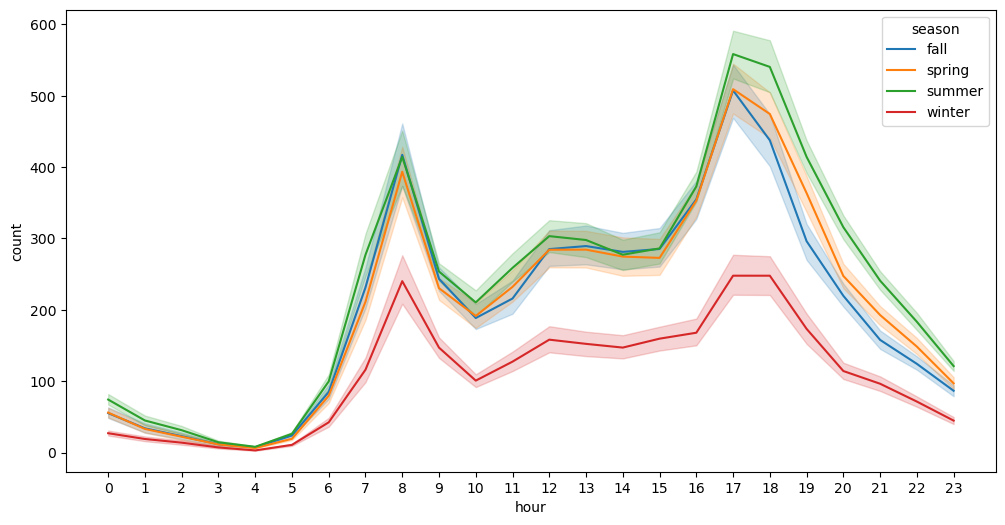

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="hour", y="count", hue="season");
x = plt.xticks(ticks = np.arange(0,24,1))

**Hourly pattern each month**

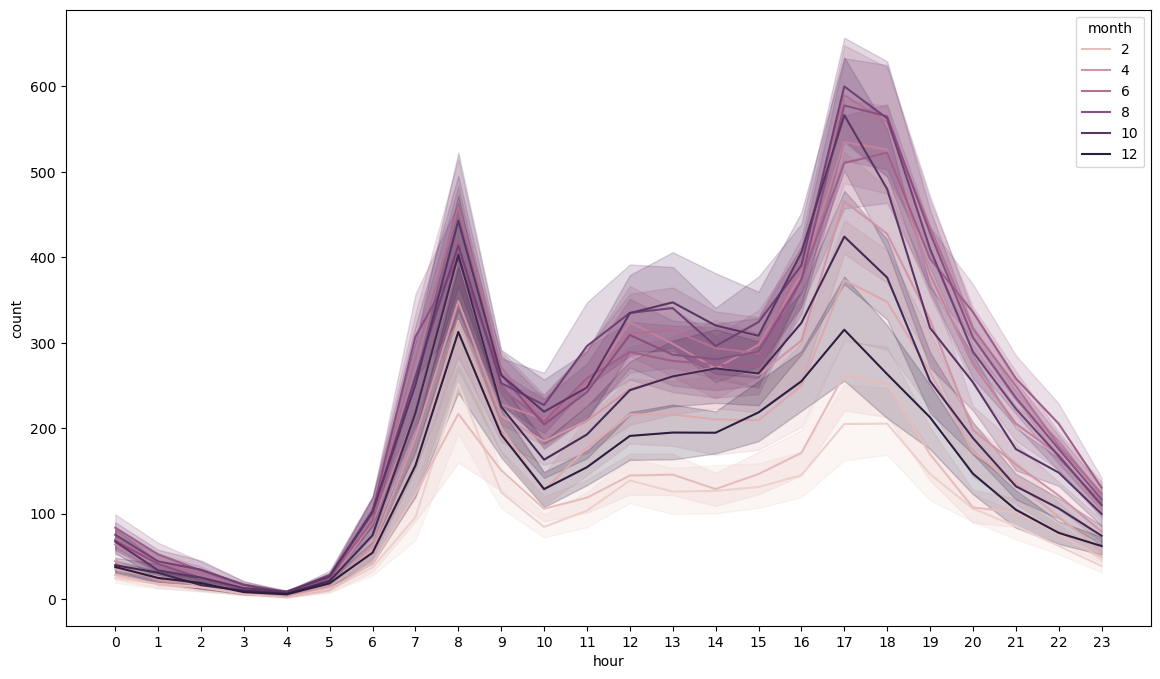

In [60]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df, x="hour", y="count", hue="month");
x = plt.xticks(ticks = np.arange(0,24,1))

> * winter has the least rental count
> * the pattern are similar to general trend, but the amount of bike rented changes according to season.
> * montly pattern is the same as season pattern. lowest on winter months

**Hourly pattern each weather situation**

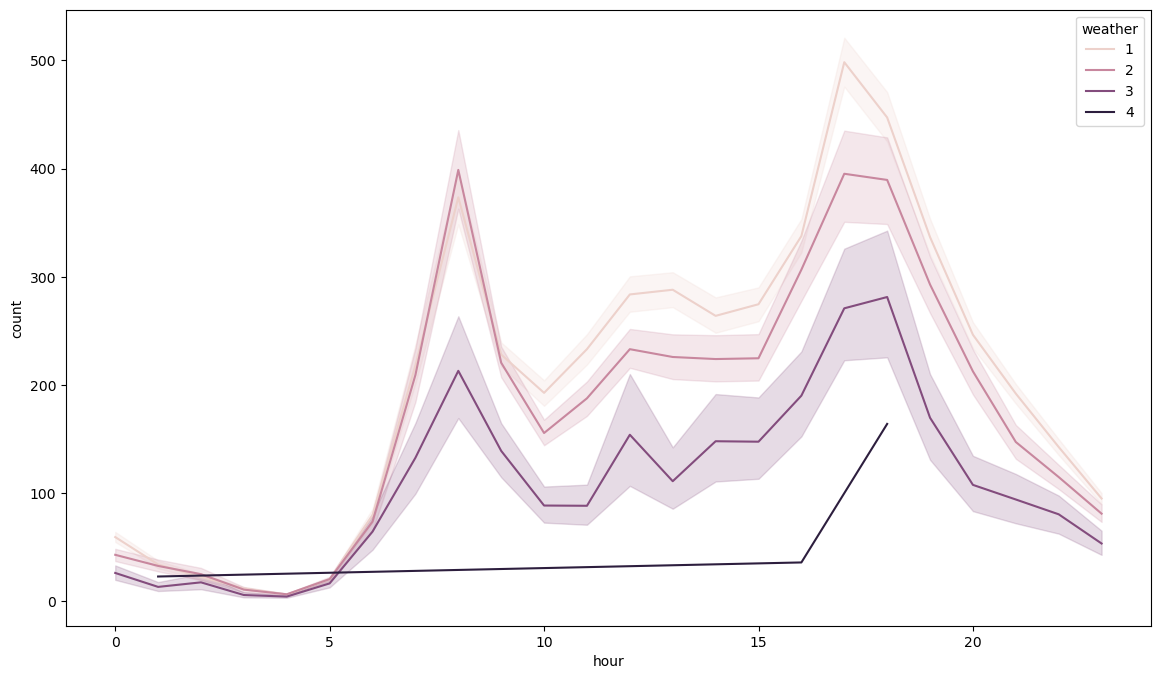

In [63]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df, x="hour", y="count", hue="weather");

<br>

**Changing "hour" into continuos variable**

In [66]:
# Apply sine and cosine transformations
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

>Direct use of hours (0 to 23) treats them as linear, which can mislead some models (e.g., the difference between 23 and 0 is not correctly represented). Sine and cosine transformations map these values onto a circle, preserving the cyclical nature.

> **Summary**
> * in this step we change "hour" and apply sin and cos to make it a continuous variable

<br>
<br>

## **Feature Selection**

### 1. Correlation Matrix for Numerical Columns

**Create correlation matrix for numerical columns**

In [73]:
numerical_cols = df[["count", "hum", "temp", "atemp", "weather", "hour_sin", "hour_cos"]]
categorical_cols = df[["month", "day", "hour", "holiday", "season"]]

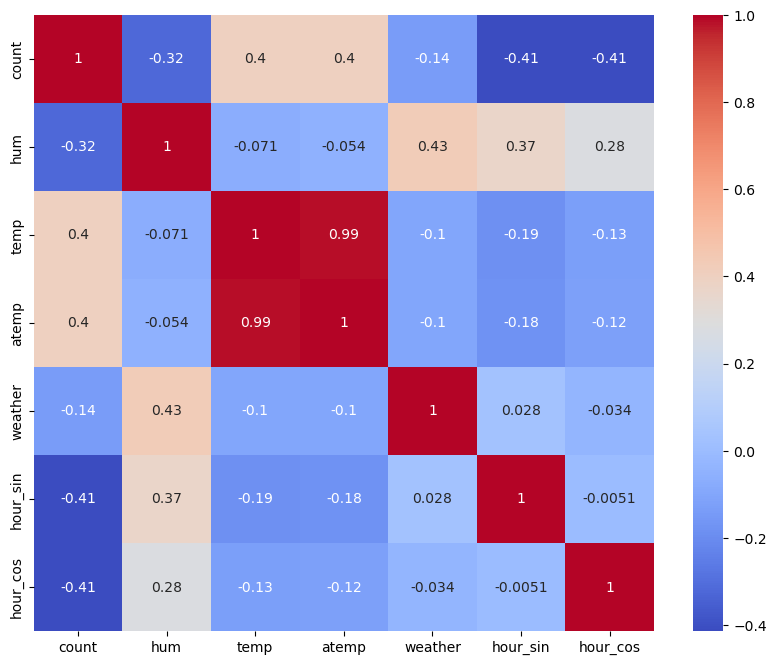

In [74]:
corr_matrix = numerical_cols.corr()

# plot the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<br>

**Check for multicollinearity**

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# define VIF Calculation function
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

num_features = numerical_cols.drop(columns=["count"])  # Drop target columns

vif_df = calculate_vif(num_features)
vif_df

,feature,VIF
0,hum,14.257765
1,temp,305.697554
2,atemp,333.781688
3,weather,7.680379
4,hour_sin,1.241630
5,hour_cos,1.161463


> These first three features are found to be highly correlated with one another (**VIF more than 5**) thus have **severe multicollinearity**. Following an investigation, it was determined that the "atemp" column contains data pertaining to the **perceived temperature**, which is **calculated using the actual temperature, humidity, and wind speed at face level**.
> 
> In the subsequent stages of the analysis, we will limit our focus to the "atemp" or feeling temperature variable, while excluding the temperature and humidity columns.
>
>  (Source : https://media.bom.gov.au/social/blog/1153/apparent-feels-like-temperature/#:~:text=The%20'feels%20like'%20(apparent,humidity%20level%20and%20wind%20speed.)

<br>

In [80]:
vif_df = calculate_vif(df[["atemp", "weather", "hour_sin", "hour_cos"]])
vif_df

,feature,VIF
0,atemp,3.550747
1,weather,3.531135
2,hour_sin,1.018008
3,hour_cos,1.003502


<br>

**Detect Outliers in "count" column**

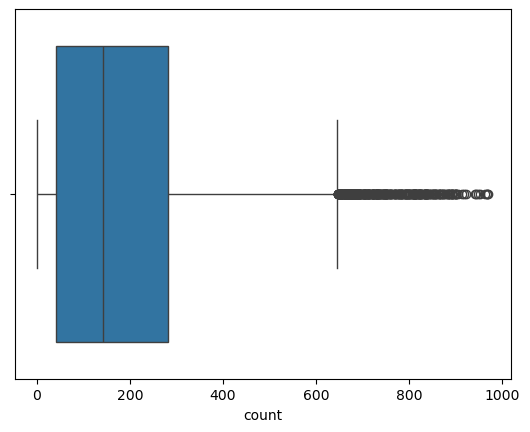

In [83]:
sns.boxplot(x = df["count"])
plt.show()

In [84]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df["count"].quantile(0.25)
Q3 = df["count"].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
print("\nNumber of Outliers:")
df[(df["count"] < lower_bound)|(df["count"] > upper_bound)].count()[0]



Number of Outliers:


338

In [85]:
upper_bound

645.0

In [86]:
df = df[(df["count"] >= lower_bound)&(df["count"] <= upper_bound)]


> * Due to the considerable variability in the count data (a highly right-skewed distribution with long tails), a total of 338 observations (representing 2.7% of the total rows) were excluded to stabilise the ML model.

> * It should be noted that the model is constrained by a **limitation** in its applicability, whereby the **model is only suitable for counts between 1 and 645**.

<br>
<br>

### 2. Correlation and VIF calculation with categorical variables

In [90]:
# changing day into weekend - because pattern on weekdays is similar. also pattern on Saturday and Sunday are also similar
# to reduce the number of columns due to encoding
df["weekend"]= df['day'].apply(lambda x: True if x in ['Saturday', 'Sunday'] else False)

In [91]:
# dropping "date" column --> has been represented by "month", and "date"
# dropping "hum" and "temp" column --> to avoid multicolinearity
# dropping "year" column --> only contains 2 values, thus irrelevant to analysis
# dropping "casual" and "registered" column --> has been represented by "count"
# dropping "month" --> has been represented by "season"
# dropping "hour" --> has been represented by "hour_sin" and "hour_cos"
# dropping "day" --> has been represented by "weekend"
df = df.drop(columns=(["date", "hum", "temp", "casual", "registered", "hour", "month", "day"]))

<br>

**One Hot Encoding for categorical data**

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11813 entries, 0 to 12164
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weather   11813 non-null  int64  
 1   holiday   11813 non-null  int64  
 2   season    11813 non-null  object 
 3   atemp     11813 non-null  float64
 4   count     11813 non-null  int64  
 5   hour_sin  11813 non-null  float64
 6   hour_cos  11813 non-null  float64
 7   weekend   11813 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(1)
memory usage: 749.8+ KB


In [95]:
# applying one hot encoding to categorical features: 
to_encode = ["season"]

for i in to_encode:
    df = pd.concat([pd.get_dummies(df[i],prefix = i, drop_first=True), df.drop(i, axis = 1)], axis =1)

In [96]:
#changing bool into int
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11813 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season_spring  11813 non-null  int32  
 1   season_summer  11813 non-null  int32  
 2   season_winter  11813 non-null  int32  
 3   weather        11813 non-null  int64  
 4   holiday        11813 non-null  int64  
 5   atemp          11813 non-null  float64
 6   count          11813 non-null  int64  
 7   hour_sin       11813 non-null  float64
 8   hour_cos       11813 non-null  float64
 9   weekend        11813 non-null  int32  
dtypes: float64(3), int32(4), int64(3)
memory usage: 830.6 KB


<br>

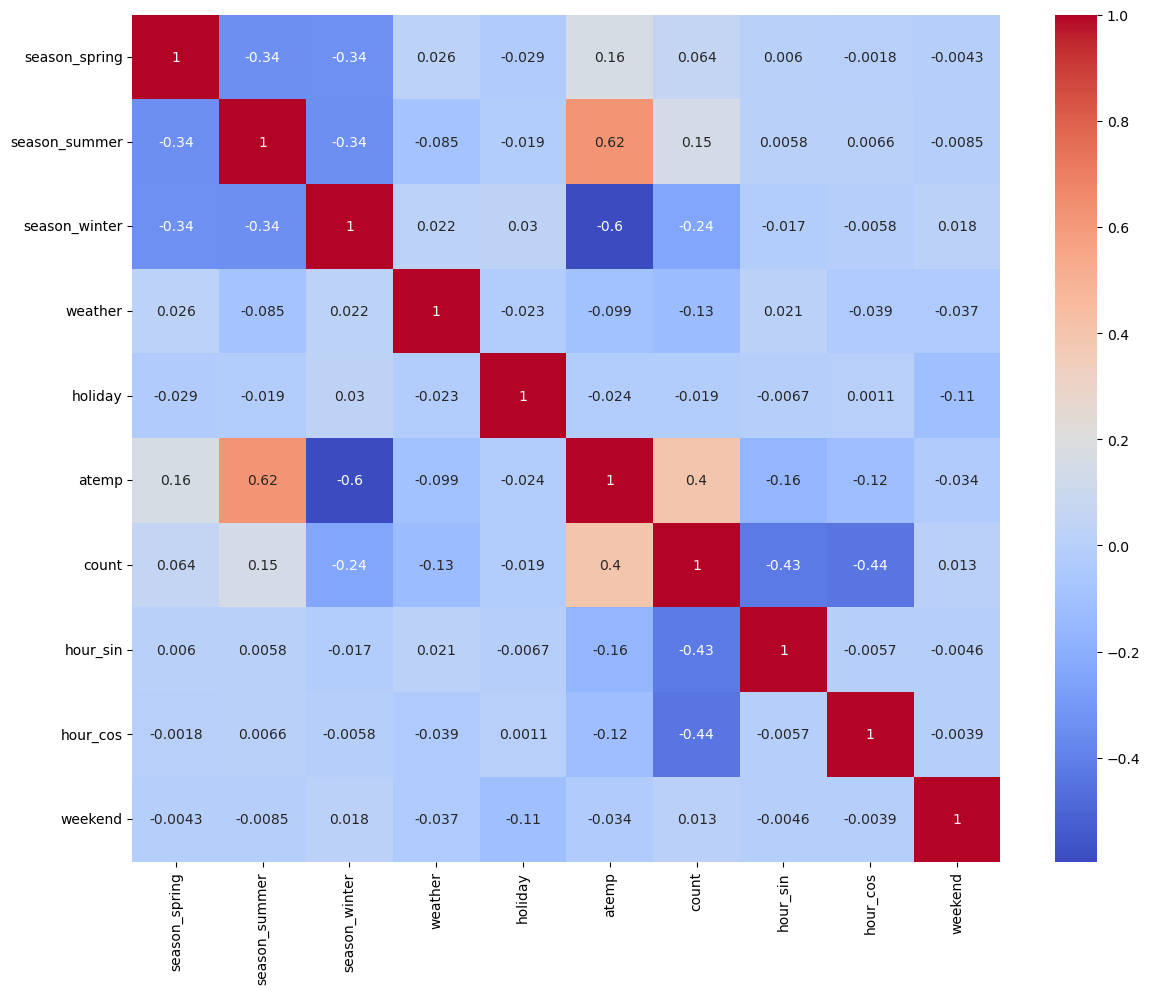

In [98]:
# checking correlation between all variables
corr_matrix = df.corr()

plt.figure(figsize=(14, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

> * Atemp exhibits a high correlation with season_summer and season_winter.
> * The chart demonstrates that the count has correlation with the variable "hour" and "atemp" 

In [100]:
df = df.drop(columns=["count"])  # Drop target columns

vif_df = calculate_vif(df)
vif_df

,feature,VIF
0,season_spring,2.342118
1,season_summer,3.264407
2,season_winter,1.657336
3,weather,4.532104
4,holiday,1.043200
5,atemp,8.693102
6,hour_sin,1.033559
7,hour_cos,1.010477
8,weekend,1.387028


> From the table above "atemp" have high multicollinearity.
> Temperature is generally higher in the summer and lower in the winter, also generally higher during the day and lower at night
> 
> VIF score 8.69 is considered high, but not severe (range 5-10)
> This will be handled using models with regularization (for example: lasso, ridge, xgboost)

> **Summary**\
> In this previous step we changed the data type of "dteday" column into datetime type and create 2 new columns : "month" and "day"\
> We also transformed "hour" into "hour_sin" and "hour_cos"
> In the feature selection:
> * deleted data that has "count" value more than 645 (outliers)
> * "day" column is transformed into "weekend" column
> * some collumn are dropped: "date", "hum", "temp", "year", "casual", "registered", "hour", "month", and "day"
> * applying one-hot encoding to column "season"
>
> This steps will be used to create pipeline, so the model can be used with other data
>
> <br>
>
>> **Features that will be included to machine learning models in this project are:**
>> * seasons (one-hot encoding applied)
>> * weather
>> * holiday
>> * hour (transformed with sin&cos)
>> * weekend (transformed from dteday)

<br>
<br>

<br>

## **Apply Data Preprocessing & Feature selection**

**Applying the transformation and selection to df_model**

In [107]:
# import libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [108]:
df_model.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt'],
      dtype='object')

<br>
Delete outliers from the dataset

In [110]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_model["cnt"].quantile(0.25)
Q3 = df_model["cnt"].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Delete outliers data
df_model = df_model[(df_model["cnt"] >= lower_bound)&(df_model["cnt"] <= upper_bound)]

<br>
Delete rows with value in "hum" column = 0

In [112]:
df_model = df_model[df_model["hum"]!=0]

<br>
From the "dteday" column, we will only use "weekend" as feature

In [114]:
df_model['dteday'] = pd.to_datetime(df_model['dteday'])
# Create the 'weekend' column where 1 indicates Saturday and Sunday, 0 otherwise
df_model['weekend'] = df_model['dteday'].dt.dayofweek >= 5
df_model['weekend'] = df_model['weekend'].astype(int) # Convert boolean to integer

<br>
From the "hr" column, we will transform it to "hour_cos" and "hour_sin"

In [116]:
df_model['hour_cos'] = np.cos(2 * np.pi * df_model["hr"] / 24)
df_model['hour_sin'] = np.sin(2 * np.pi * df_model["hr"] / 24)

<br>
Drop columns : "dteday", "hum", "temp", "casual", "registered", "hr"

In [118]:
df_model = df_model.drop(columns=([ "dteday", "hum", "temp", "casual", "registered", "hr"]))

<br>
Change season name to be more easily interpreted

In [120]:
season_mapping = {1: "winter", 2: "spring", 3: "summer", 4: "fall"}
df_model["season"] = df_model["season"].replace(season_mapping)

<br>
One Hot Encoding for column "season"

In [122]:
# applying one hot encoding to categorical features: 
to_encode = ["season"]

for i in to_encode:
    df_model = pd.concat([pd.get_dummies(df_model[i],prefix = i, drop_first=True), df_model.drop(i, axis = 1)], axis =1)

In [123]:
df_model.columns

Index(['season_spring', 'season_summer', 'season_winter', 'weathersit',
       'holiday', 'atemp', 'cnt', 'weekend', 'hour_cos', 'hour_sin'],
      dtype='object')

<br>
<br>

# **Machine Learning**

### 1. Train-Test Data Split

In [127]:
# ensure target variable has no zeros or negative values
df_model["cnt"].min()

1

In [128]:
from sklearn.model_selection import train_test_split

X,y = df_model.drop("cnt", axis=1), df_model["cnt"]

# Splitting the data
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size =0.3,  random_state=18)

X_train.shape, X_test.shape   

((8269, 9), (3544, 9))

### 2. Training and Evaluation Metrics of ML Models

**Trying baseline models**

In [131]:
# evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

# importing libraries of regression models
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor                                                                                                                                                                                                                                                #mahinisawesomemate
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

> * Modeling on a logarithmic scale can be advantageous particularly when dealing with skewed data, where a few large values dominate the distribution.\
> Logarithmic transformation can compress the range of values, thus makes the model less sensitive to these outliers.

In [133]:
from sklearn.compose import TransformedTargetRegressor

# Define models
Models = {
    "Linear Regression": LinearRegression(),
    "Regularized Linear (Lasso)" : Lasso(alpha =0.3),
    "Regularized Linear (Ridge)" : Ridge(alpha =0.5),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "Random Forest": RandomForestRegressor(random_state=1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost" : XGBRegressor(random_state=1)
}

# Modelling is done on a logarithmic scale, but then inverted for interpretation.
log_Models = {}
for name, model in Models.items():
    log_Models[name] = TransformedTargetRegressor(model, func=np.log, inverse_func=np.exp)
log_Models

{'Linear Regression': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                            regressor=LinearRegression()),
 'Regularized Linear (Lasso)': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                            regressor=Lasso(alpha=0.3)),
 'Regularized Linear (Ridge)': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                            regressor=Ridge(alpha=0.5)),
 'Decision Tree': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                            regressor=DecisionTreeRegressor(random_state=1)),
 'Random Forest': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                            regressor=RandomForestRegressor(random_state=1)),
 'Gradient Boosting': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                            regressor=GradientBoostingRegressor()),
 'K-Nearest

<br>

> * Given the considerable imbalance in the count, it is therefore necessary to apply cross-validation in order to guarantee the optimal distribution of the data.

In [135]:
from sklearn.model_selection import cross_val_score, KFold

crossval = KFold(n_splits=5, shuffle=True, random_state=1)
results = {}

scaler = StandardScaler()

for name, model in log_Models.items():
    
    estimator = Pipeline([
        ('scaler', scaler),
        ('model', model)
    ])
        
    rmse_scores = -cross_val_score(estimator, X_train, y_train, cv=crossval, scoring="neg_root_mean_squared_error", error_score='raise')
    mse_scores = -cross_val_score(estimator, X_train, y_train, cv=crossval, scoring="neg_mean_squared_error", error_score='raise')
    mae_scores = -cross_val_score(estimator, X_train, y_train, cv=crossval, scoring="neg_mean_absolute_error", error_score='raise')
    r2_scores = cross_val_score(estimator, X_train, y_train, cv=crossval, scoring="r2", error_score='raise')

    results[name] = {
        "RMSE_mean" : rmse_scores.mean(), "RMSE_std" : rmse_scores.std(),
        "MAE_mean" : mae_scores.mean(), "MAE_std" : mae_scores.std(),
        "R2_mean" : r2_scores.mean(), "R2_std" : r2_scores.std(),
    }

In [136]:
# Display evaluation metrics results
results_df = pd.DataFrame(results).T
results_df

,RMSE_mean,RMSE_std,MAE_mean,MAE_std,R2_mean,R2_std
Linear Regression,139.694343,3.791464,92.230533,2.613278,0.193480,0.053961
Regularized Linear (Lasso),142.314383,2.894813,95.379759,2.452819,0.164101,0.024734
Regularized Linear (Ridge),139.685138,3.791112,92.225350,2.612901,0.193586,0.053952
Decision Tree,86.052120,0.401021,56.018425,0.639095,0.694265,0.009060
Random Forest,73.121182,1.290513,48.229870,0.993496,0.779126,0.011278
Gradient Boosting,75.795197,1.813179,49.258901,0.971357,0.762807,0.010374
K-Nearest Neighbors,72.539622,2.174492,47.635087,1.358766,0.782540,0.014588
XGBoost,68.540010,1.362572,45.304767,0.881906,0.805849,0.011851


> Significant difference between the RMSE and MAE values, where the RMSE value is higher is caused by squaring the residuals or errors before averaging them. This means RMSE are more sensitive to large error values. To summarize, there are large error values produced by all algorithms used.
> 
> - Based on the RMSE, MAE and R2 value, XGBoost is the best model.
> - Followed by Gradient boosting, K-Nearest Neighbors, and Random Forest
> - Although XGBoost is the best performing algorithm, predictions will be made on the test set with other 2 best benchmark models: KNN and Random Forest to see which model is more stabil during testing

In [138]:
from math import sqrt

top_models = {
    "RandomForest": RandomForestRegressor(random_state=1),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=1)
}

# Modelling is done on a logarithmic scale, but then inverted for interpretation.
top_log_models = {}

for name, model in top_models.items():
    top_log_models[name] = TransformedTargetRegressor(model, func=np.log, inverse_func=np.exp)

results = {}
for i in top_log_models:
    
    model = Pipeline([
        ('scaler', scaler),
        ('model', top_log_models[i])
    ])
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[i] = {
        "RMSE": rmse, 
        "MAE": mae, 
        "R2": r2}

In [139]:
# Display evaluation metrics results
score_before_tuning = pd.DataFrame(results).T
score_before_tuning

,RMSE,MAE,R2
RandomForest,71.947409,47.438622,0.788080
K-Nearest Neighbors,72.012372,47.561652,0.787697
XGBoost,67.807952,45.488000,0.811764


### 3. Hyperparametric Tuning

> Given the superior performance of the XGBoost model in comparison to the other two models, it will be employed as the final model. Hyperparameter tuning will be conducted on the XGBoost modelto enhancing its performance.

**Randomized search CV**

In [143]:
# import library
from sklearn.model_selection import  RandomizedSearchCV

In [144]:
# Hyperparam space XGboost
param_tuning = {
    'model__max_depth': list(np.arange(1, 20)), # The maximum depth of a tree
    'model__learning_rate': list(np.arange(1, 100)/100), # A lower value makes the model learn more slowly
    'model__n_estimators': list(np.arange(100, 501,5)), #The number of boosting rounds (trees) used in training
    'model__subsample': list(np.arange(2, 10)/10), # Subsample ratio of the training instance
    'model__gamma': list(np.arange(1, 11)), # Minimum loss reduction required to make a further partition
    'model__colsample_bytree':list(np.arange(1, 10)/10), # Number of features used for each tree
    'model__reg_alpha': list(np.logspace(-5, 1, 10)), # regularization term on weights
    'model__objective':['reg:squarederror']
}

xgb_model = XGBRegressor(random_state=1)
estimator_xgb = Pipeline([
        ('scaler', scaler),
        ('model', xgb_model)
    ])

random_search = RandomizedSearchCV(
    random_state = 1,
    estimator = estimator_xgb,
    param_distributions = param_tuning,
    n_iter = 500,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
    cv = crossval,
    refit = 'neg_root_mean_squared_error', # Only one parameter can be used for evaluation
    n_jobs = -1)

<br>

**Retrain model with best parameters from hyperparametric tuning**

In [146]:
random_search.fit(X_train,y_train)

print('XGBoost')
print('Best_score:', random_search.best_score_)
print('Best_params:') 
random_search.best_params_

XGBoost
Best_score: -65.3380694760484
Best_params:


{'model__subsample': 0.8,
 'model__reg_alpha': 0.004641588833612777,
 'model__objective': 'reg:squarederror',
 'model__n_estimators': 390,
 'model__max_depth': 6,
 'model__learning_rate': 0.02,
 'model__gamma': 8,
 'model__colsample_bytree': 0.9}

<br>

**Conduct testing with best parameters from hyperparametric tuning**

In [148]:
# Model XGBoost
model = {'XGBoost': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_search.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mse_xgb_tuning = mean_squared_error(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mse_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'R2': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,R2
XGBoost,65.122203,44.92048,0.82638


<br>

### 4. Before and after hyperparametric tuning: Comparison

In [151]:
score_before_tuning.iloc[[2]]

,RMSE,MAE,R2
XGBoost,67.807952,45.488,0.811764


In [152]:
score_after_tuning

,RMSE,MAE,R2
XGBoost,65.122203,44.92048,0.82638


<br>
<br>

### 5.Residual Analysis

> The model experienced improved performance (reduced RMSE, MAE & increasedm R2 values) with hyperparameter tuning, although only slightly.

 >
 | **Result** | **RMSE** | **MAE** |  **R2** |
 | --- | --- | --- | --- |
 | Before tuning | 67.81  | 45.45 | 0.812 |
 | After tuning | 65.12  | 44.92 | 0.826 |

>* An RMSE of 65.12 means that, on average, the model's predictions are 65.12 units away from the actual values.
>* An MAE of 44.92 means that, on average, the model's predictions are 44.92 units away from the actual values.
>* R² of 0.826 means that 82.6% of the variance in the dependent variable can be explained by the model. This suggests a strong relationship between the model and the dependent variable.

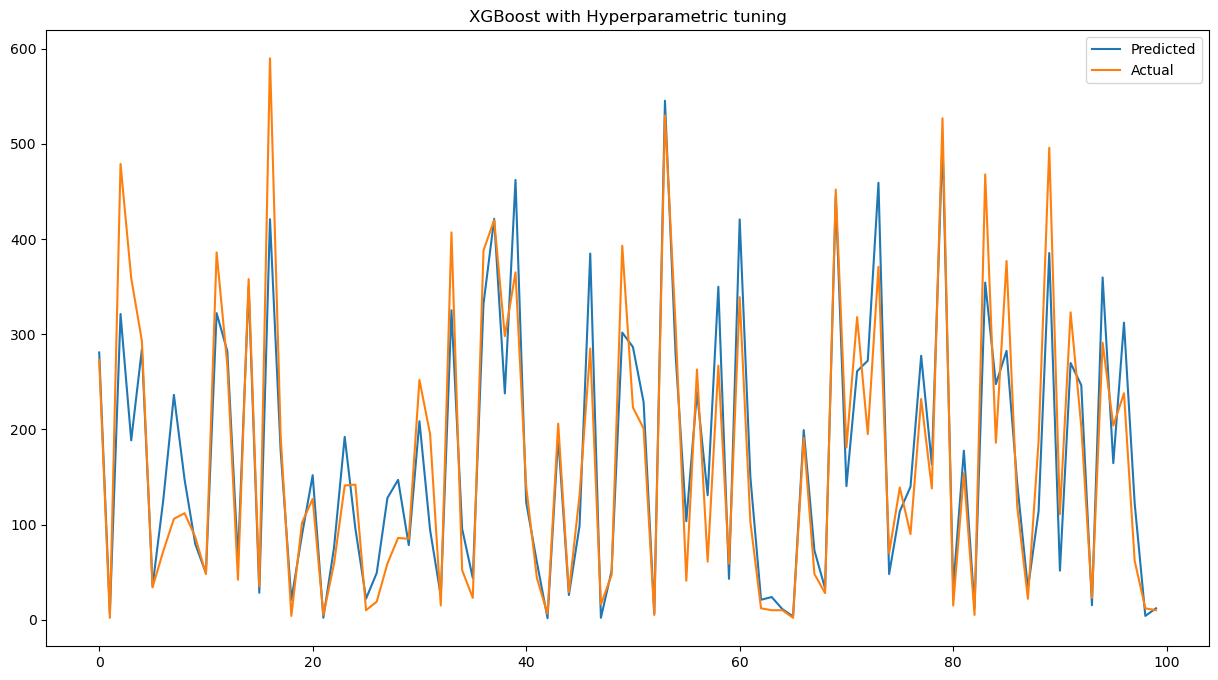

In [157]:
#Plotting Graph of observed vs predicted values
plt.figure(figsize=(15,8))
plt.plot((y_pred_xgb_tuning)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title("XGBoost with Hyperparametric tuning")
plt.show()

<br>

**Plotting Actual vs Prediction count**

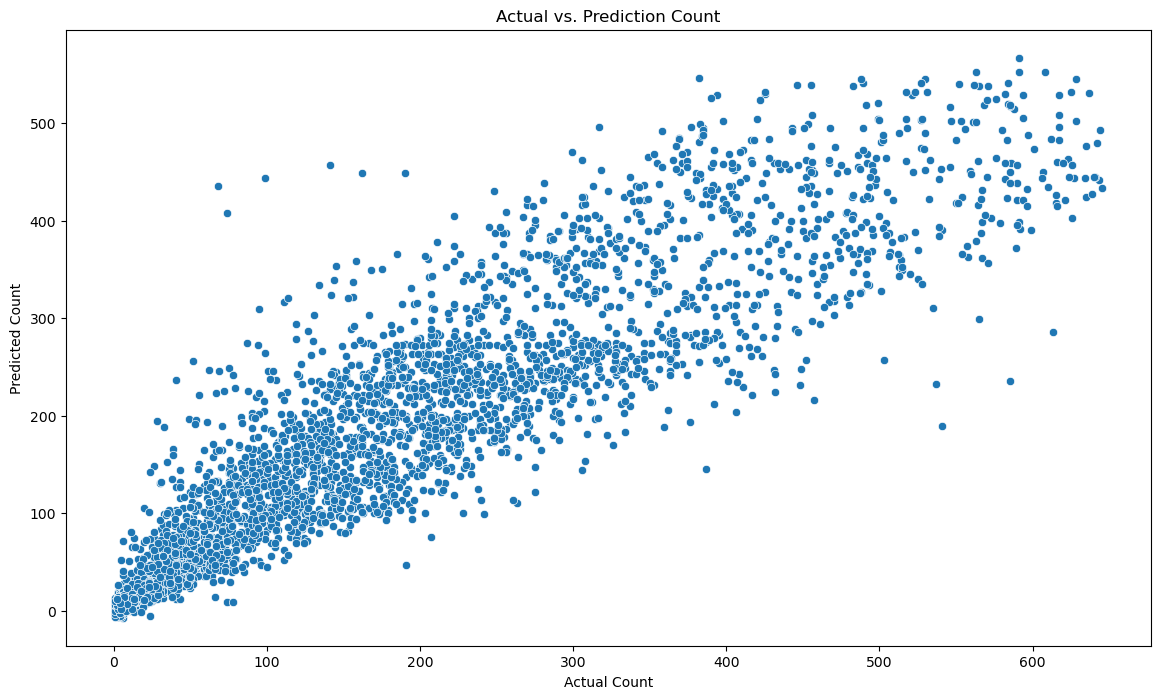

In [159]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count');

> Ideally, the points should lie close to the 45-degree line where the predicted values are equal to the actual values. however the wide spread suggests greater prediction errors, both under- and over-prediction. The pattern are generally more spreaded the larger the count values. 

<br>

**Plotting Residual values**

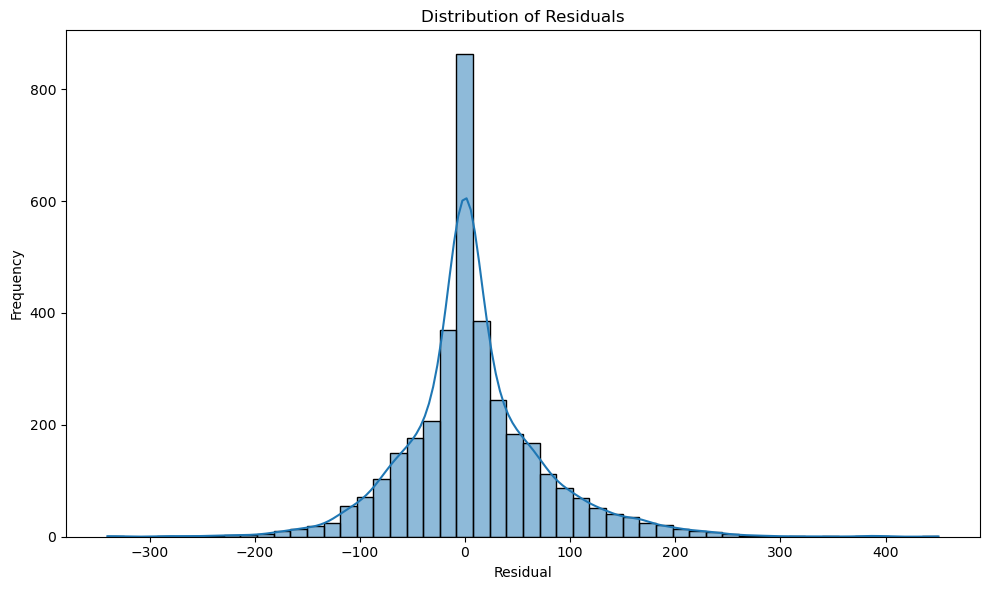

In [162]:
# Calculate residuals
residuals = y_test - y_pred

# Create a DataFrame for easier plotting
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
})

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

> * The graphic above illustrates that the distribution of residuals is generally bell-shaped and centred around zero. It indicates that the regression model fits the data well and the underlying assumptions are likely satisfied.
> * There is a long tail on both ends, although the left tail is slightly shorter than the right tail. These large outliers indicate that there are some large outliers or predictions that are far from the actual value.

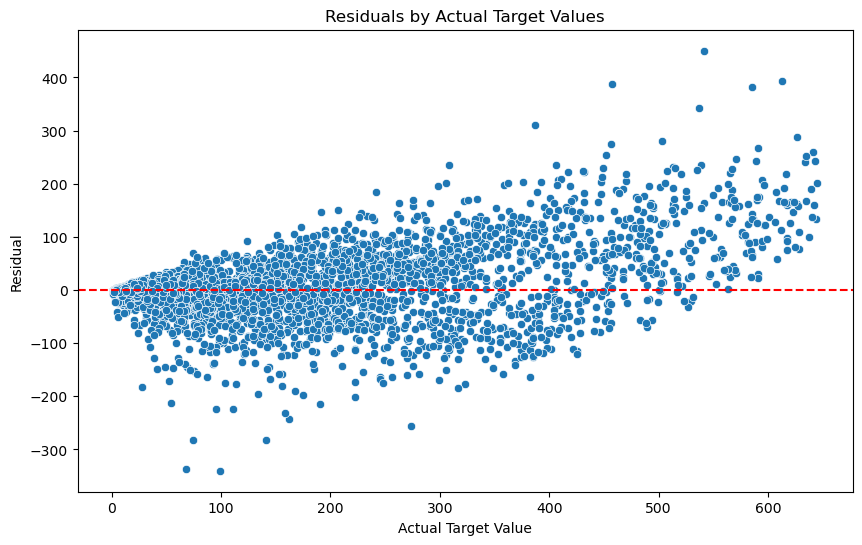

In [164]:
# Plot errors by target values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Residual', data=error_df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals by Actual Target Values')
plt.xlabel('Actual Target Value')
plt.ylabel('Residual')
plt.show()

> * The residuals' spread increases with actual target values, indicating the presence of heteroscedasticity. In such cases, it is recommended to either transform the target variable or employ weighted regression.

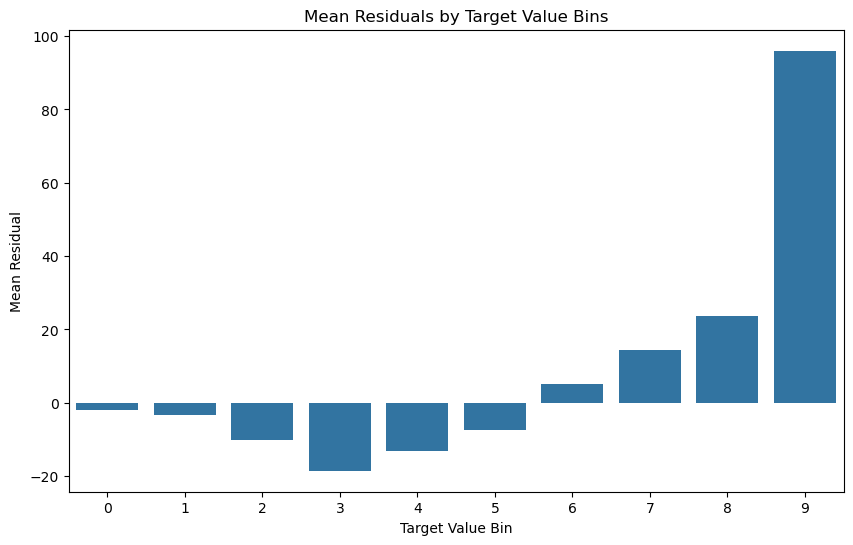

In [166]:
# Define bins (quantiles or fixed ranges)
num_bins = 10 # Divide the target values into quantiles or custom bins.
error_df['Bin'] = pd.qcut(error_df['Actual'], q=num_bins, labels=False)

# Compute mean residuals per bin
bin_means = error_df.groupby('Bin')['Residual'].mean().reset_index()
bin_counts = error_df.groupby('Bin')['Residual'].count().reset_index()

# Merge mean residuals with bin counts
bin_summary = pd.merge(bin_means, bin_counts, on='Bin')
bin_summary.columns = ['Bin', 'Mean Residual', 'Count']

# Plot mean residuals per bin
plt.figure(figsize=(10, 6))
sns.barplot(x='Bin', y='Mean Residual', data=bin_summary)
plt.title('Mean Residuals by Target Value Bins')
plt.xlabel('Target Value Bin')
plt.ylabel('Mean Residual')
plt.show()

> Bar Plot shows the mean residual (error) for each bin. This helps identify if errors are systematically higher or lower in certain ranges of target values.

>The bar plot illustrates the mean residual error for each data bin. This enables the identification of any systematic discrepancies in the level of error across specific ranges of target values.
> 
> This model demonstrates a better capability to accurately predict values for small count values. However, a significant increase in error is observed when the count value is large. This may be attributed to the insufficient data available for large count values. It is important to recall the earlier EDA, which indicated that the count values are markedly right-skewed with a median value of 136 and mean value of 173.
> 
> From the graph above, it is evident that the largest 10% of values in this model are not accurate. **It is recommended that the model be used for "count" values 1-580** (~90% target value of this dataset).

<br>

**Feature Importance**

In [171]:
import xgboost as xgb

Using feature_importances_ function to find out which features greatly affect the target (count)

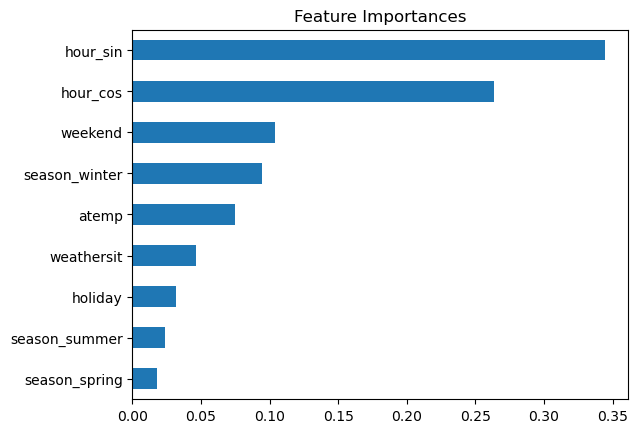

In [173]:
feat_importance = pd.Series(xgb_tuning['model'].feature_importances_, index=X.columns).sort_values(ascending = True)
feat_importance.plot(kind='barh', title='Feature Importances')
plt.show()

> Based on the modelling that has been done, the features 'hour_sin', 'hour_cos' are the most influential features on 'count'.

## **Conclusion**

> * This model get a RMSE score of 65.12 means, MAE score of 44.92 and R² score of 0.826. The MAE score suggests that the model's predictions are 44.92 units away from the actual values. That means this model's prediction of count values is off by around 45 on average. This is a lot considering the count values have a median  of 136 and mean of 173. R² score of 0.826 means 82.6% variance in the dependent variable can be explained by the features in the model. It is also possible that the prediction misses much further as there are alse some large outliers or predictions.
>   
> * Regarding the machine learning model applied in this project, it is evident from the residual analysis that the largest 10% of values in this model are not accurate. Thus it is recommended that the model be used for "count" values 1-580 (~90% target value). 
>   
> * Based on the modelling that has been done, the features 'hour_sin', 'hour_cos' are the most influential features on 'count'. "hour_sin" signify the AM hours and "hour_cos" signify PM hour. In other words, the time plays significant role to the number of bikes used.

## **Recommendations**

> * This model can certainly still be improved to produce better predictions. Firstly is to to either transform the target variable or employ weighted regression as he residuals' spread also indicates the presence of heteroscedasticity (see Residual Analysis part).
>   
> * The next one is by A/B testing. This is done by comparing the performance of the same model on different subsets of data (e.g., different time periods or geographic regions), the level of effectiveness of using the model to the bike rental count can be measured. Furthermore, the insights derived from the A/B testing results can facilitate the identification of potential improvements to the model.
>   
> * Use model base feature selection (e.g., decision trees, random forests) identify and retain the most significant features and to eliminate features that do not contribute to the model’s performance. Irrelevant features can add noise and reduce model performance.
>   
> * This model target variable is largely skewed. More data, especially on larger count values can help the model learn better and improve performance. Larger set of data will also be beneficial to address outliers issues.
> 
> * It would be advantageous to incorporate additional features that are more correlate with the target ('count'). For example: the location of the docking station, the journey duration, and other factors, whenever feasible. Larger datasets and a greater number of variables allows for the investigation of more complex models. 

<br>
<br>

--------------------------
--------------------------

<br>

##### **Save model**

This approach ensures all preprocessing steps and the tuned XGBoost model are saved and can be easily loaded for future use, maintaining consistency in preprocessing during training and inference.

In [183]:
# # Data Preprocessing

# # Create "weekend" column
# df['dteday'] = pd.to_datetime(df['dteday'])
# # Create the 'weekend' column where 1 indicates Saturday and Sunday, 0 otherwise
# df['weekend'] = df['dteday'].dt.dayofweek >= 5
# df['weekend'] = df['weekend'].astype(int) # Convert boolean to integer

# # transform "hr" into "hour_cos" and "hour_sin"
# df['hour_cos'] = np.cos(2 * np.pi * df["hr"] / 24)
# df['hour_sin'] = np.sin(2 * np.pi * df["hr"] / 24)

# # drop irrelevant columns
# df = df.drop(columns=([ "dteday", "hum", "temp", "casual", "registered", "hr"]))

# # change season name
# season_mapping = {1: "winter", 2: "spring", 3: "summer", 4: "fall"}
# df["season"] = df["season"].replace(season_mapping)

# # applying one hot encoding to "season" column: 
# to_encode = ["season"]
# for i in to_encode:
#     df = pd.concat([pd.get_dummies(df[i],prefix = i, drop_first=True), df.drop(i, axis = 1)], axis =1)

In [184]:
# import pickle
# import xgboost as xgb

# # Save the trained XGBoost model with tuned parameters
# with open('xgboost_model.pkl', 'wb') as file:
#     pickle.dump(xgb_tuning['model'], file)

# # Load the trained XGBoost model
# with open('xgboost_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)
    
# # Using model to make predictions
# predictions = loaded_model.predict(X_test)

# # Get valuation metrics (RMSE)
# np.sqrt(mean_squared_error(y_test, predictions))

<br>

**References**

> Original Source: http://capitalbikeshare.com/system-data \
> Weather Information: http://www.freemeteo.com
>
> 



<br>

-----

<br>